In [4]:
getwd()
old_data <- read.csv("C:/Users/meizhi/Desktop/final/OJ.csv", header = FALSE)
minutevol=as.numeric(as.character(old_data[2:9650,1]))
tropicprice=as.numeric(as.character(old_data[2:9650,2]))
minuteprice=as.numeric(as.character(old_data[2:9650,3]))
dmnckprice=as.numeric(as.character(old_data[2:9650,4]))
tropicad=as.numeric(as.character(old_data[2:9650,5]))
mintead=as.numeric(as.character(old_data[2:9650,6]))
dunckad=as.numeric(as.character(old_data[2:9650,7]))
class(minutevol)
data = data.frame(minutevol=minutevol,tropicprice=tropicprice,minuteprice=minuteprice,dmnckprice=dmnckprice,tropicad=tropicad,mintead=mintead,dunckad=dunckad)
head(data)

[1] "C:/Users/meizhi/Desktop/final"

[1] "numeric"

minutevol,tropicprice,minuteprice,dmnckprice,tropicad,mintead,dunckad
636928,0.06048264,0.05127604,0.03191406,0,0,1
787456,0.06039063,0.04867188,0.04050781,0,0,0
1612800,0.06039063,0.04518229,0.03582031,0,1,1
347136,0.06039063,0.05127604,0.03582031,0,0,0
367616,0.06039063,0.05127604,0.03542969,1,0,0
492544,0.06039063,0.05127604,0.03386719,0,0,1


In [5]:
train_sub=sample(nrow(data),7/10*nrow(data))
train_data <- data[train_sub,]
test_data <- data[-train_sub,]

In [6]:
class(test_data$dunckad)

[1] "numeric"

In [ ]:
# train_set=data[1:7000,1:7]
# test_set=data[7001:9650,1:7]

In [8]:
model1 <-lm(minutevol~tropicprice+minuteprice+dmnckprice+tropicad+mintead+dunckad,data=train_data)
# model1 <- lm(minutevol~minuteprice,data=train_set)
summary(model1)


Call:
lm(formula = minutevol ~ tropicprice + minuteprice + dmnckprice + 
    tropicad + mintead + dunckad, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2698415  -784840  -223787   421582 35018840 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3648777     181865  20.063  < 2e-16 ***
tropicprice   72388209    4524673  15.999  < 2e-16 ***
minuteprice -179262527    4975914 -36.026  < 2e-16 ***
dmnckprice    44651479    5861606   7.618 2.94e-14 ***
tropicad         73868      47485   1.556     0.12    
mintead         974378      43071  22.623  < 2e-16 ***
dunckad        -492830      41116 -11.986  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1619000 on 6747 degrees of freedom
Multiple R-squared:  0.3038,	Adjusted R-squared:  0.3032 
F-statistic: 490.7 on 6 and 6747 DF,  p-value: < 2.2e-16


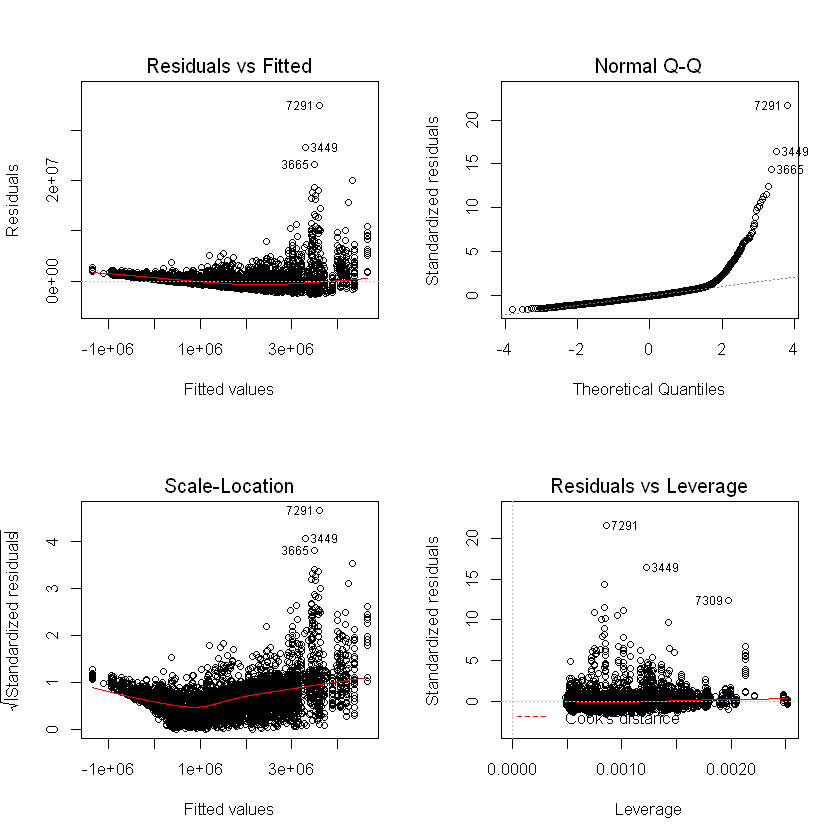

In [9]:
par(mfrow=c(2,2))
plot(model1)

In [10]:
summary(model1)$coefficient

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3648776.53,181865.01,20.063103,5.143787e-87
tropicprice,72388208.92,4524673.00,15.998550,1.422110e-56
minuteprice,-179262527.00,4975913.48,-36.026054,4.154465e-260
dmnckprice,44651478.80,5861605.83,7.617619,2.937734e-14
tropicad,73867.45,47485.11,1.555592,1.198521e-01
mintead,974377.98,43071.09,22.622552,2.779405e-109
dunckad,-492829.52,41115.75,-11.986392,8.996020e-33


In [11]:
confint(model1)

,2.5 %,97.5 %
(Intercept),3292263.70,4005289.4
tropicprice,63518421.64,81257996.2
minuteprice,-189016888.07,-169508165.9
dmnckprice,33160881.16,56142076.5
tropicad,-19218.35,166953.3
mintead,889945.05,1058810.9
dunckad,-573429.37,-412229.7


In [13]:
install.packages("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'



corrplot 0.92 loaded


,minutevol,tropicprice,minuteprice,dmnckprice,tropicad,mintead,dunckad
minutevol,1.00000000,0.06943920,-0.34616298,0.02745006,-0.05912648,0.39208695,-0.19750427
tropicprice,0.06943920,1.00000000,0.54965304,0.57237775,-0.30294668,0.15377905,-0.06896595
minuteprice,-0.34616298,0.54965304,1.00000000,0.49937240,-0.05037096,-0.15424516,0.02461410
dmnckprice,0.02745006,0.57237775,0.49937240,1.00000000,-0.15771582,0.09792591,-0.10007959
tropicad,-0.05912648,-0.30294668,-0.05037096,-0.15771582,1.00000000,-0.11464885,-0.08927400
mintead,0.39208695,0.15377905,-0.15424516,0.09792591,-0.11464885,1.00000000,-0.14421232
dunckad,-0.19750427,-0.06896595,0.02461410,-0.10007959,-0.08927400,-0.14421232,1.00000000


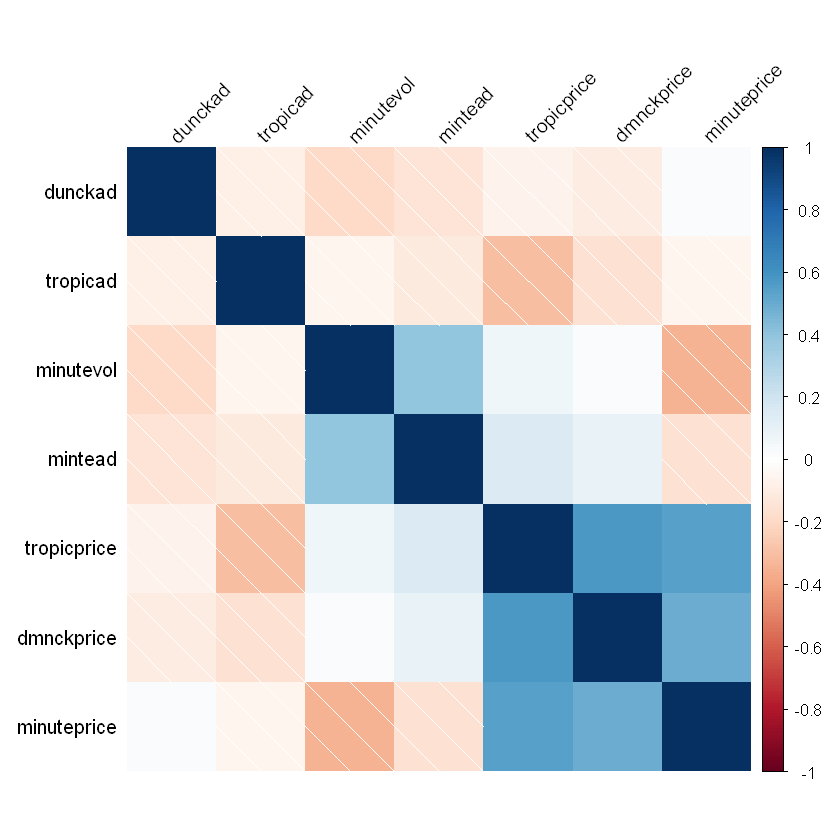

In [14]:
library(corrplot)
heat_map <- cor(data)
corrplot(heat_map,method="shade",tl.col="black",tl.srt=45,order="AOE")
heat_map

In [46]:
# model2 <- lm(minutevol~tropicprice+minuteprice+dmnckprice+tropicad+mintead+dunckad+minuteprice*mintead+tropicad*tropicprice+dunckad*dmnckprice,data=train_set)
# summary(model2)

In [15]:

install.packages('car')

also installing the dependency 'lme4'




  There are binary versions available but the source versions are later:
     binary source needs_compilation
lme4 1.1-26 1.1-29              TRUE
car  3.0-10 3.0-13             FALSE

  Binaries will be installed
package 'lme4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\meizhi\AppData\Local\Temp\RtmpgV11Em\downloaded_packages


installing the source package 'car'



Loading required package: carData


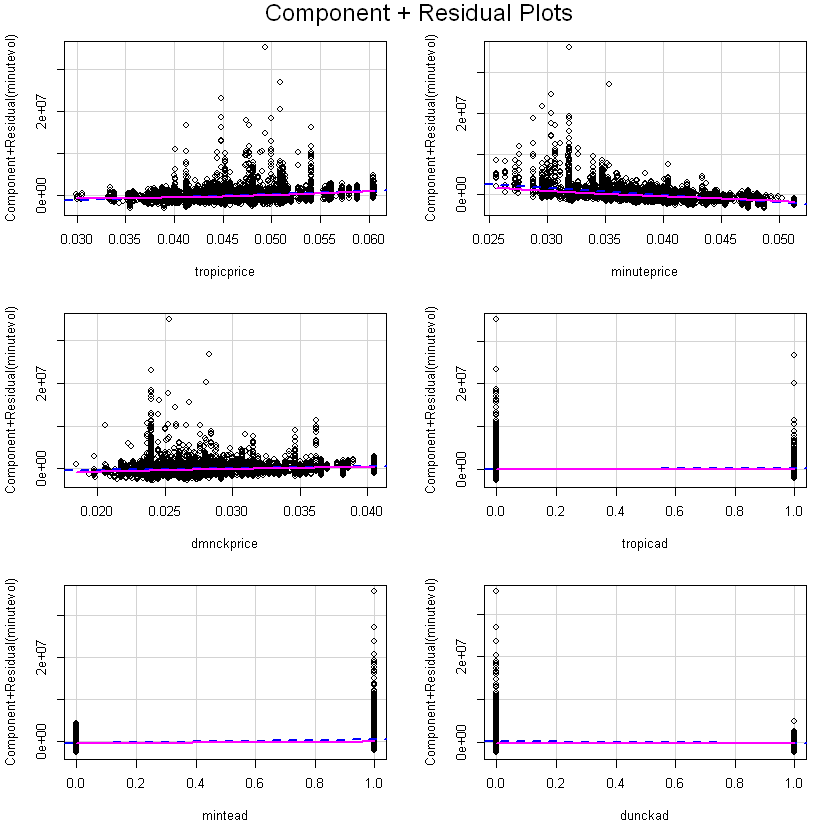

In [16]:
library(car)
crPlots(model1)

In [17]:
install.packages("randomForest")

Warning message:
"package 'randomForest' is not available (for R version 3.6.1)"

In [19]:
library(randomForest)
model2 <- randomForest(minutevol~tropicprice+minuteprice+dmnckprice+tropicad+mintead+dunckad,data=train_data,importance=TRUE, ntree=500,mtry=5)
summary(model2)
print(model2)

                Length Class  Mode     
call               6   -none- call     
type               1   -none- character
predicted       6754   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       6754   -none- numeric  
importance        12   -none- numeric  
importanceSD       6   -none- numeric  
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               6754   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     


Call:
 randomForest(formula = minutevol ~ tropicprice + minuteprice +      dmnckprice + tropicad + mintead + dunckad, data = train_data,      importance = TRUE, ntree = 500, mtry = 5) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 1.011036e+12
                    % Var explained: 73.11


,%IncMSE,IncNodePurity
tropicprice,41.29502,5.784256e+15
minuteprice,76.22415,8.389089e+15
dmnckprice,34.20661,3.158594e+15
tropicad,15.94628,1.146455e+15
mintead,50.79253,3.658059e+15
dunckad,25.85594,3.217934e+14


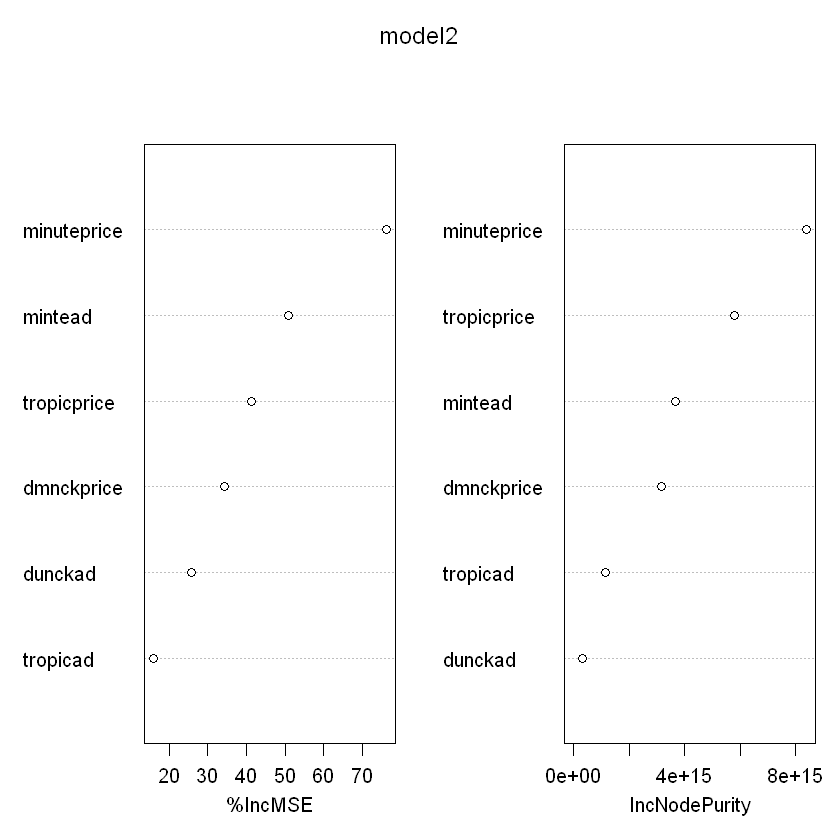

In [20]:
par(pin = c(3,2))
par(mfrow=c(2,2))
importance(model2)
varImpPlot(model2)

In [ ]:
# model3 <- randomForest(minutevol~minuteprice+tropicad,data=train_set,importance=TRUE, ntree=3000)
# summary(model3)
# print(model3)

In [21]:
install.packages('xgboost')
install.packages("xgboost")
library(xgboost)


  There is a binary version available but the source version is later:
         binary  source needs_compilation
xgboost 1.4.1.1 1.6.0.1              TRUE

  Binaries will be installed
package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\meizhi\AppData\Local\Temp\RtmpgV11Em\downloaded_packages

  There is a binary version available but the source version is later:
         binary  source needs_compilation
xgboost 1.4.1.1 1.6.0.1              TRUE

  Binaries will be installed
package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\meizhi\AppData\Local\Temp\RtmpgV11Em\downloaded_packages


Warning message:
"package 'xgboost' was built under R version 3.6.3"

In [22]:
head(train_data)

,minutevol,tropicprice,minuteprice,dmnckprice,tropicad,mintead,dunckad
706,555008,0.04981771,0.04364583,0.03152344,0,0,1
7995,538624,0.04770833,0.03635417,0.02402344,0,1,1
8893,635904,0.05585938,0.05127604,0.03152344,0,0,1
6797,350208,0.04040841,0.03718750,0.03308594,0,0,0
6221,550912,0.04184896,0.03718750,0.02214844,0,0,1
4721,909312,0.04414063,0.03635417,0.02402344,0,0,1


In [23]:
library(Matrix)
library(xgboost)
####训练集的数据预处理
# 将自变量转化为矩阵
traindata1 <- data.matrix(train_data[,2:7]) 
# 利用Matrix函数，将sparse参数设置为TRUE，转化为稀疏矩阵
traindata2 <- Matrix(traindata1,sparse=T) 
traindata3 <- train_data[,1]
# 将自变量和因变量拼接为list
traindata4 <- list(data=traindata2,label=traindata3) 
# 构造模型需要的xgb.DMatrix对象，处理对象为稀疏矩阵
dtrain <- xgb.DMatrix(data = traindata4$data, label = traindata4$label) 
dtrain

xgb.DMatrix  dim: 6754 x 6  info: label  colnames: yes

In [24]:
####测试集的数据预处理
# 将自变量转化为矩阵
testdata1 <- data.matrix(test_data[,2:7]) 
# 利用Matrix函数，将sparse参数设置为TRUE，转化为稀疏矩阵
testdata2 <- Matrix(testdata1,sparse=T) 
# 将因变量转化为numeric
testdata3 <- test_data[,1]
class(testdata3)
# 将自变量和因变量拼接为list
testdata4 <- list(data=testdata2,label=testdata3) 
# 构造模型需要的xgb.DMatrix对象，处理对象为稀疏矩阵
dtest <- xgb.DMatrix(data = testdata4$data, label = testdata4$label) 
dtest

[1] "numeric"

xgb.DMatrix  dim: 2895 x 6  info: label  colnames: yes

In [26]:
xgb <- xgboost(data = dtrain,max_depth=5000, eta=0.3, nround=600)


[1]	train-rmse:1897347.625000 
[2]	train-rmse:1486986.125000 
[3]	train-rmse:1206920.375000 
[4]	train-rmse:1017748.437500 
[5]	train-rmse:890576.687500 
[6]	train-rmse:807342.000000 
[7]	train-rmse:751837.500000 
[8]	train-rmse:715082.562500 
[9]	train-rmse:690650.875000 
[10]	train-rmse:674072.562500 
[11]	train-rmse:662915.937500 
[12]	train-rmse:655083.187500 
[13]	train-rmse:649645.812500 
[14]	train-rmse:645852.437500 
[15]	train-rmse:643219.625000 
[16]	train-rmse:641366.062500 
[17]	train-rmse:640057.812500 
[18]	train-rmse:639127.312500 
[19]	train-rmse:638464.875000 
[20]	train-rmse:637992.187500 
[21]	train-rmse:637653.687500 
[22]	train-rmse:637410.187500 
[23]	train-rmse:637236.000000 
[24]	train-rmse:637110.875000 
[25]	train-rmse:637020.500000 
[26]	train-rmse:636955.687500 
[27]	train-rmse:636908.937500 
[28]	train-rmse:636875.437500 
[29]	train-rmse:636851.375000 
[30]	train-rmse:636834.000000 
[31]	train-rmse:636821.500000 
[32]	train-rmse:636812.375000 
[33]	train-rm

In [29]:
#对测试集进行预测
#对测试集进行预测
fit3 <- round(predict(xgb,dtest))


In [33]:
set <- data.frame(pred = fit3, actual = test_data$minutevol)


In [34]:
#calculate MSE
mean((set$actual - set$pred))

[1] 11104.49